# EastWestAirlines Data

# Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch            
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\ExcelR Assignment\\Excelr DS\\Clustering\\EastWestAirlines.csv")

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [5]:
df.shape

(3999, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

# Normalization

In [8]:
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()
new_df = normalize.fit_transform(df.iloc[:,1:].to_numpy())
df_norm = pd.DataFrame(new_df, columns = df.columns[1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# Dendrogram

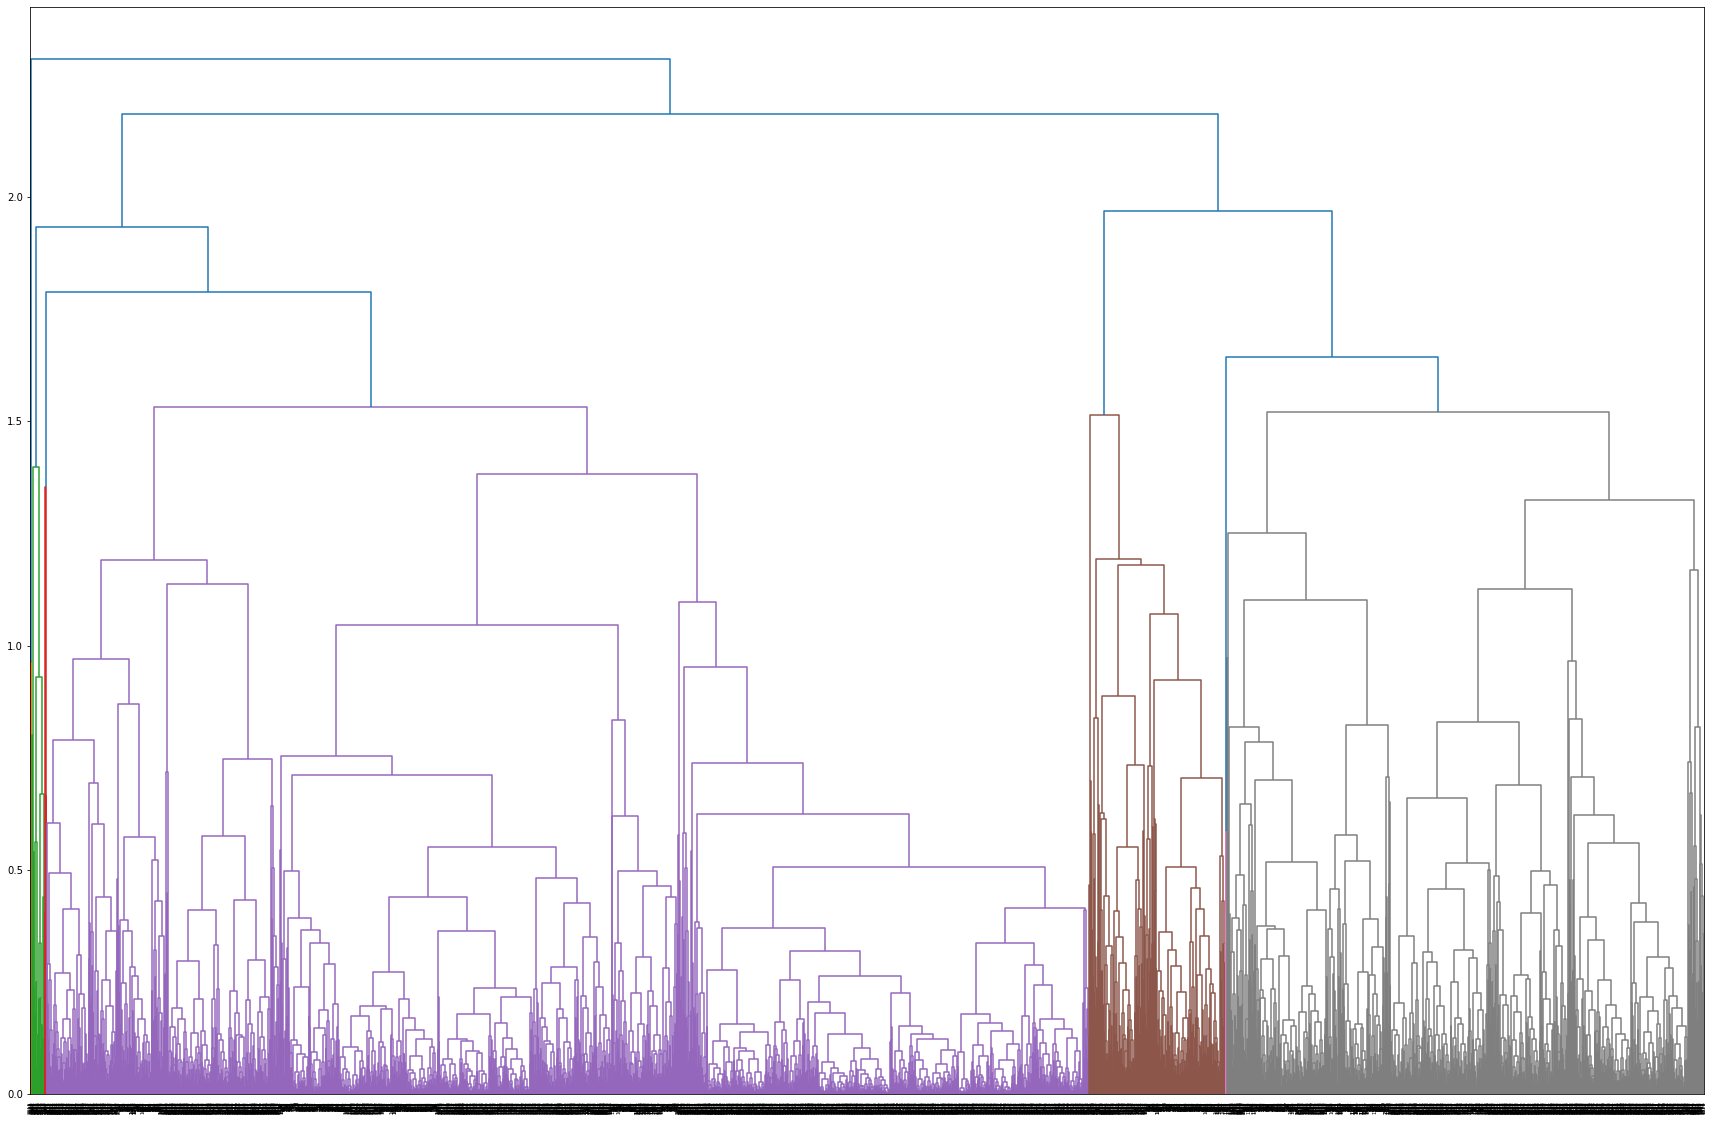

In [9]:
plt.figure(figsize=(30,20))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'complete'))

# Model Building

In [10]:
hc = AgglomerativeClustering(n_clusters= 8, affinity= 'euclidean', linkage= 'complete')

In [11]:
y_hc =hc.fit_predict(df_norm)
Clusters = pd.DataFrame(y_hc, columns = ['Clusters'])

In [12]:
Clusters

,Clusters
0,2
1,2
2,2
3,2
4,1
...,...
3994,0
3995,0
3996,0
3997,2


In [13]:
df_norm['h_Clusterid'] = Clusters

In [14]:
df_norm.sort_values('h_Clusterid')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_Clusterid
2350,0.011447,0.000000,0.50,0.0,0.0,0.067110,0.186047,0.000000,0.000000,0.432964,1.0,0
1588,0.113837,0.129889,0.00,0.0,0.0,0.047405,0.069767,0.000000,0.000000,0.566554,1.0,0
2962,0.057252,0.000000,0.75,0.0,0.0,0.162998,0.279070,0.000000,0.000000,0.404268,1.0,0
815,0.014084,0.000000,0.25,0.0,0.0,0.077524,0.104651,0.000000,0.000000,0.738003,1.0,0
1593,0.107559,0.000000,0.00,0.0,0.0,0.117519,0.162791,0.421456,0.169811,0.584278,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1177,0.018896,1.000000,0.50,0.0,0.0,0.048228,0.116279,0.000000,0.000000,0.672052,1.0,6
2015,0.031224,0.079656,0.75,0.0,0.0,0.306032,0.755814,0.717137,0.849057,0.461659,1.0,7
3594,0.016200,0.000000,0.75,0.0,0.0,0.317523,0.790698,0.455917,0.867925,0.159513,1.0,7
3583,0.093917,0.044851,0.00,0.0,0.0,0.272879,1.000000,1.000000,1.000000,0.165300,1.0,7


In [15]:
df['h_Clusterid'] = Clusters

In [16]:
df.sort_values('h_Clusterid')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_Clusterid
2350,2368,19516,0,3,1,1,17696,16,0,0,3593,1,0
1588,1603,194074,1448,1,1,1,12500,6,0,0,4701,1,0
2962,2984,97606,0,4,1,1,42980,24,0,0,3355,1,0
815,825,24011,0,2,1,1,20442,9,0,0,6123,1,0
1593,1608,183370,0,1,1,1,30988,14,12988,9,4848,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,1189,32214,11148,3,1,1,12717,10,0,0,5576,1,6
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,7
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,7
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,7


# K-Means Clustering

In [17]:
from sklearn.cluster import KMeans

In [18]:
df1 = pd.read_csv("C:\\Users\\HP\\Desktop\\ExcelR Assignment\\Excelr DS\\Clustering\\EastWestAirlines.csv")

In [19]:
df1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## Normalization Function

In [21]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
scaled_df1 = scaled.fit_transform(df1.iloc[:,1:])

In [22]:
scaled_df1

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [23]:
kmeans =KMeans(n_clusters=4 , random_state=0)
kmeans.fit(scaled_df1)

KMeans(n_clusters=4, random_state=0)

In [24]:
kmeans.inertia_

27446.372456681373

In [25]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score

wcss = []
sil_score = []
cal_haz_score = []

for i in range (1,11):
    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit(scaled_df1)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue
    sil_score.append(silhouette_score(scaled_df1, kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(scaled_df1, kmeans.labels_))

In [26]:
wcss

[43989.0,
 35409.51145242438,
 30899.246824652197,
 27446.372456681373,
 24541.329582045775,
 21089.97362892964,
 19165.86145865566,
 17316.866446128297,
 16043.406242309515,
 14726.983322766791]

In [27]:
sil_score

[0.3256981835090824,
 0.3121716765282414,
 0.32563311512799126,
 0.31819537664378844,
 0.3338735662323181,
 0.22085896619040385,
 0.23657639934232003,
 0.2984364654012059,
 0.2617650187720957]

In [28]:
cal_haz_score

[968.4464517601235,
 846.4066128459535,
 802.6294080679738,
 791.2595637632751,
 867.1073529718658,
 861.7228891659855,
 878.1595440795196,
 868.7617322895064,
 880.6675321168498]

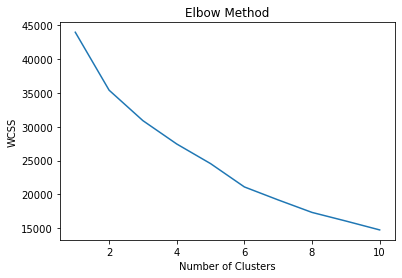

In [29]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
cluster_new = KMeans(n_clusters=6, random_state=42)
cluster_new.fit(scaled_df1)

KMeans(n_clusters=6, random_state=42)

In [31]:
cluster_new.labels_

array([2, 2, 2, ..., 0, 2, 2])

# Assign clusters to the data set

In [32]:
df1['clusterid_new'] = cluster_new.labels_

In [33]:
cluster_new.cluster_centers_

array([[ 0.43266936, -0.10828239,  1.19393518, -0.09824189, -0.05461619,
         0.91337752,  0.74449492, -0.0812539 , -0.08927402,  0.3768003 ,
         0.57410034],
       [ 1.13686833,  0.4142613 ,  0.1345493 , -0.09824189, -0.06276658,
         0.65640088,  1.70548646,  3.77107713,  4.00212558,  0.27153799,
         0.88395812],
       [-0.29915339, -0.13134693, -0.60644259, -0.09824189, -0.06070105,
        -0.51983522, -0.49838239, -0.18682791, -0.19939754, -0.20508283,
        -0.35442184],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 0.45710365,  6.73109194, -0.04322862, -0.09824189, -0.06276658,
         0.06371677,  0.06535804,  0.3596938 ,  0.39424679, -0.07122344,
         0.38731797],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.051

In [34]:
df1.groupby('clusterid_new').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusterid_new,,,,,,,,,,,,
0,1594.881180,117252.014354,60.495215,3.704944,1.000000,1.001595,39256.378788,18.760766,347.125997,1.037480,4896.791866,0.649123
1,1743.867133,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
2,2239.169553,43519.741845,42.457511,1.226742,1.000000,1.000403,4605.759162,6.825614,198.250503,0.616593,3696.446234,0.198953
3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,2057.295082,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377
5,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


In [35]:
df1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [36]:
df1[df1['clusterid_new']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,0
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,0
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,0
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,0


In [37]:
df1[df1['clusterid_new']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,1
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,1
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,1
94,97,185549,0,5,1,1,110859,39,2950,16,6778,1,1
112,115,124198,0,5,1,1,66330,23,4833,10,7710,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,1
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,1
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,1
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,1


In [38]:
df1[df1['clusterid_new']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,6,16420,0,1,1,1,0,0,0,0,6942,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,2
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [39]:
df1[df1['clusterid_new']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,3
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,3
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,3
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,3
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,3
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,3
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,3
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,3
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,3
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,3


In [40]:
df1[df1['clusterid_new']==4]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
70,72,84409,5031,2,1,1,15436,16,1150,4,7766,0,4
315,319,119977,2556,1,1,1,9275,16,1400,4,7226,1,4
335,340,278457,6727,4,1,1,57313,27,1000,2,7101,1,4
420,426,529886,7210,1,1,1,23866,26,7741,15,8296,1,4
532,538,86520,3445,5,1,1,64450,20,1000,2,6592,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,3666,47662,3071,1,1,1,100,1,100,1,760,0,4
3649,3672,41537,3576,1,1,1,3000,3,250,1,669,1,4
3701,3724,8964,3861,1,1,1,0,0,0,0,594,0,4
3747,3770,6015,4929,1,1,1,0,0,0,0,30,0,4


In [41]:
df1[df1['clusterid_new']==5]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,5
198,202,8669,0,1,3,1,11397,16,0,0,7486,1,5
226,230,117329,0,1,2,1,6448,11,0,0,7416,1,5
381,386,167670,0,1,3,1,15907,13,0,0,6994,0,5
392,398,11189,0,1,2,1,9044,20,0,0,8296,1,5
561,568,380930,0,2,2,1,22485,25,213,1,6539,1,5
794,804,55610,0,1,2,1,5095,13,0,0,6151,0,5
940,951,44824,0,1,3,1,21107,19,2000,4,5916,1,5
1149,1161,84856,0,1,2,1,6894,13,0,0,5547,0,5
1270,1283,16103,0,1,3,1,10819,13,0,0,5427,0,5


In [42]:
df1['clusterid_new'].value_counts()

2    2483
0    1254
1     143
4      61
5      43
3      15
Name: clusterid_new, dtype: int64

In [43]:
df1[df1['ID#'].isin([2928,1,3524])]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
2906,2928,17769,0,1,2,1,5165,10,0,0,1807,0,5
3501,3524,177785,0,5,1,1,77203,15,0,0,1251,1,0


In [44]:
df1.groupby(['clusterid_new'])['ID#'].apply(lambda x: tuple(x))

clusterid_new
0    (5, 7, 10, 12, 16, 17, 19, 20, 21, 22, 29, 31,...
1    (43, 51, 66, 97, 115, 130, 138, 190, 195, 224,...
2    (1, 2, 3, 4, 6, 8, 11, 13, 14, 15, 18, 23, 24,...
3    (109, 389, 861, 915, 1047, 1257, 1313, 1895, 1...
4    (72, 319, 340, 426, 538, 596, 661, 686, 691, 7...
5    (9, 202, 230, 386, 398, 568, 804, 951, 1161, 1...
Name: ID#, dtype: object

# DBSCAN Clustering

In [46]:
from sklearn.cluster import DBSCAN

In [47]:
df2 = pd.read_csv("C:\\Users\\HP\\Desktop\\ExcelR Assignment\\Excelr DS\\Clustering\\EastWestAirlines.csv")

In [48]:
df2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [50]:
df2.shape

(3999, 12)

In [51]:
df2.drop(['ID#'],axis=1,inplace=True)

In [52]:
df2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


<AxesSubplot:>

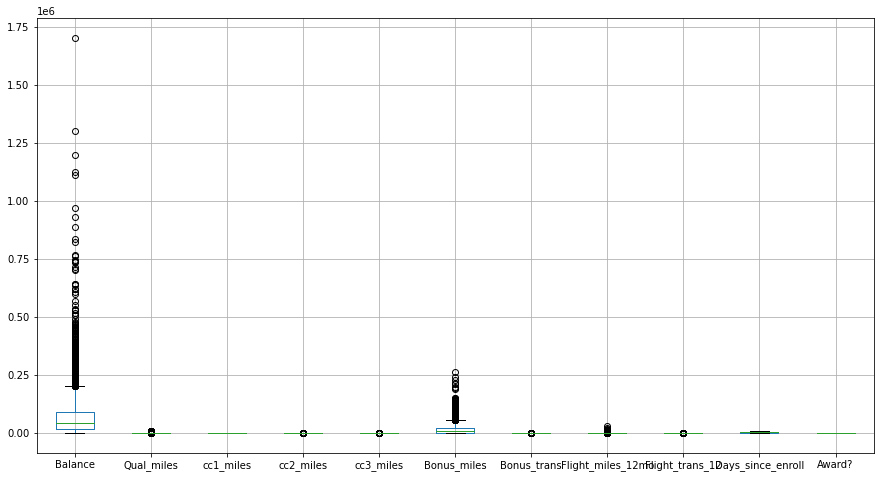

In [53]:
plt.figure(figsize=(15,8))
df2.boxplot()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


<AxesSubplot:>

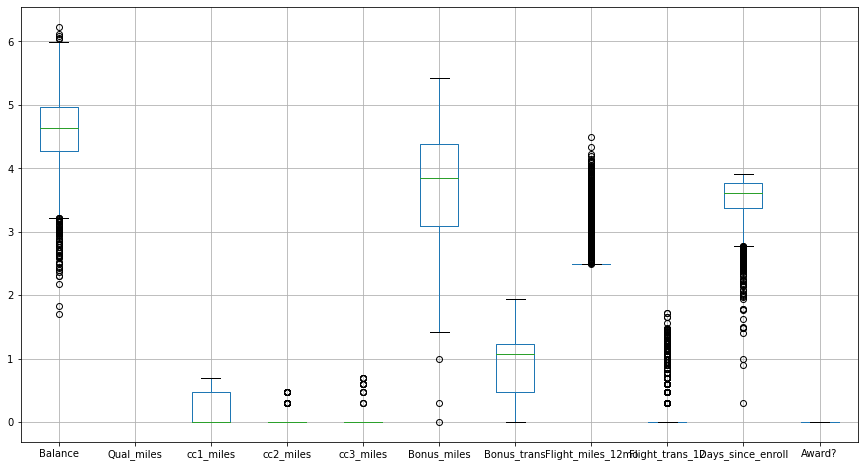

In [55]:
plt.figure(figsize=(15,8))
df2.apply(np.log10).boxplot()

In [56]:
array = df2.values

In [57]:
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [59]:
scaler = StandardScaler().fit(array)
X = scaler.transform(array)

In [61]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [66]:
dbscan = DBSCAN(eps =1, min_samples=12)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=12)

In [67]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [69]:
cl=pd.DataFrame(dbscan.labels_, columns=['cluster'])

In [70]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [71]:
clustered = pd.concat([df2,cl],axis=1)

In [72]:
clustered

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [74]:
clustered[clustered['cluster']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,-1
22,20584,0,1,1,1,3450,11,3450,11,6884,0,-1
24,205651,500,1,1,1,4025,21,700,4,7932,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3950,59650,0,1,1,1,5050,16,3950,13,1476,0,-1
3959,13942,0,1,2,1,5822,12,0,0,1458,0,-1
3961,131125,862,1,1,1,4993,11,50,1,1443,0,-1
3967,26504,0,2,1,1,10599,29,1000,7,1445,0,-1


In [79]:
clustered.mean()

Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
cluster                  0.077769
dtype: float64

In [80]:
clustered.sort_values('cluster')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
1999,327126,1452,5,1,1,97997,25,350,3,4440,1,-1
3391,57374,1621,1,1,1,2100,5,2100,5,1440,0,-1
701,417875,0,4,1,1,44472,18,0,0,6308,0,-1
702,340874,0,5,1,1,68090,43,5676,27,6305,1,-1
1529,57857,1099,1,1,1,62650,37,12400,29,4996,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3158,129887,0,1,1,1,26810,10,810,3,2566,1,1
2414,1452,0,1,1,1,2375,5,0,0,3396,1,1
3156,11324,0,3,1,1,11082,11,0,0,2661,1,1
3175,188883,0,1,1,1,5500,3,0,0,2613,1,1


In [83]:
clustered['cluster'].value_counts()

 0    2266
 1    1022
-1     711
Name: cluster, dtype: int64

In [84]:
X.shape

(3999, 11)